In [1]:
%matplotlib inline

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import mixture


np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target


print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print('%-20s\t%-5s\t%-5s\t%-5s\t%-5s'%("init","time","NMI","Homo","Cpl"))
# print(digits)
def evalution(estimator,name,data):
    t0 = time()
    y_pred=estimator.fit_predict(data)
    print('%-20s\t%.2fs\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0),
             metrics.normalized_mutual_info_score(labels,y_pred),
             metrics.homogeneity_score(labels, y_pred),
             metrics.completeness_score(labels, y_pred)
             ))

evalution(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="KMeans", data=data)

evalution(AffinityPropagation(),name="AffinityPropagation",data=data)

evalution(MeanShift(bandwidth=5),name="MeanShift",data=data)

evalution(SpectralClustering(n_clusters=n_digits,
                             assign_labels="discretize",
                             random_state=0,
                             affinity="nearest_neighbors"),
          name="SpectralClustering",
          data=data)

evalution(AgglomerativeClustering(linkage="ward", n_clusters=10),name="AgglomerativeClustering",data=data)

evalution(AgglomerativeClustering(n_clusters=n_digits),name="AgglomerativeClustering",data=data)

evalution(DBSCAN(eps=4, min_samples=15),name="DBSCAN",data=data)
evalution(mixture.GaussianMixture(n_components=10, covariance_type='full'),name="GaussianMixture",data=data)

 

n_digits: 10, 	 n_samples 1797, 	 n_features 64
init                	time 	NMI  	Homo 	Cpl  
KMeans              	0.17s	0.628	0.605	0.652
AffinityPropagation 	3.75s	0.655	0.932	0.460
MeanShift           	8.43s	0.675	0.833	0.546
SpectralClustering  	0.33s	0.813	0.796	0.830
AgglomerativeClustering	0.17s	0.797	0.758	0.836
AgglomerativeClustering	0.14s	0.797	0.758	0.836
DBSCAN              	0.37s	0.444	0.297	0.663
GaussianMixture     	0.39s	0.602	0.538	0.673


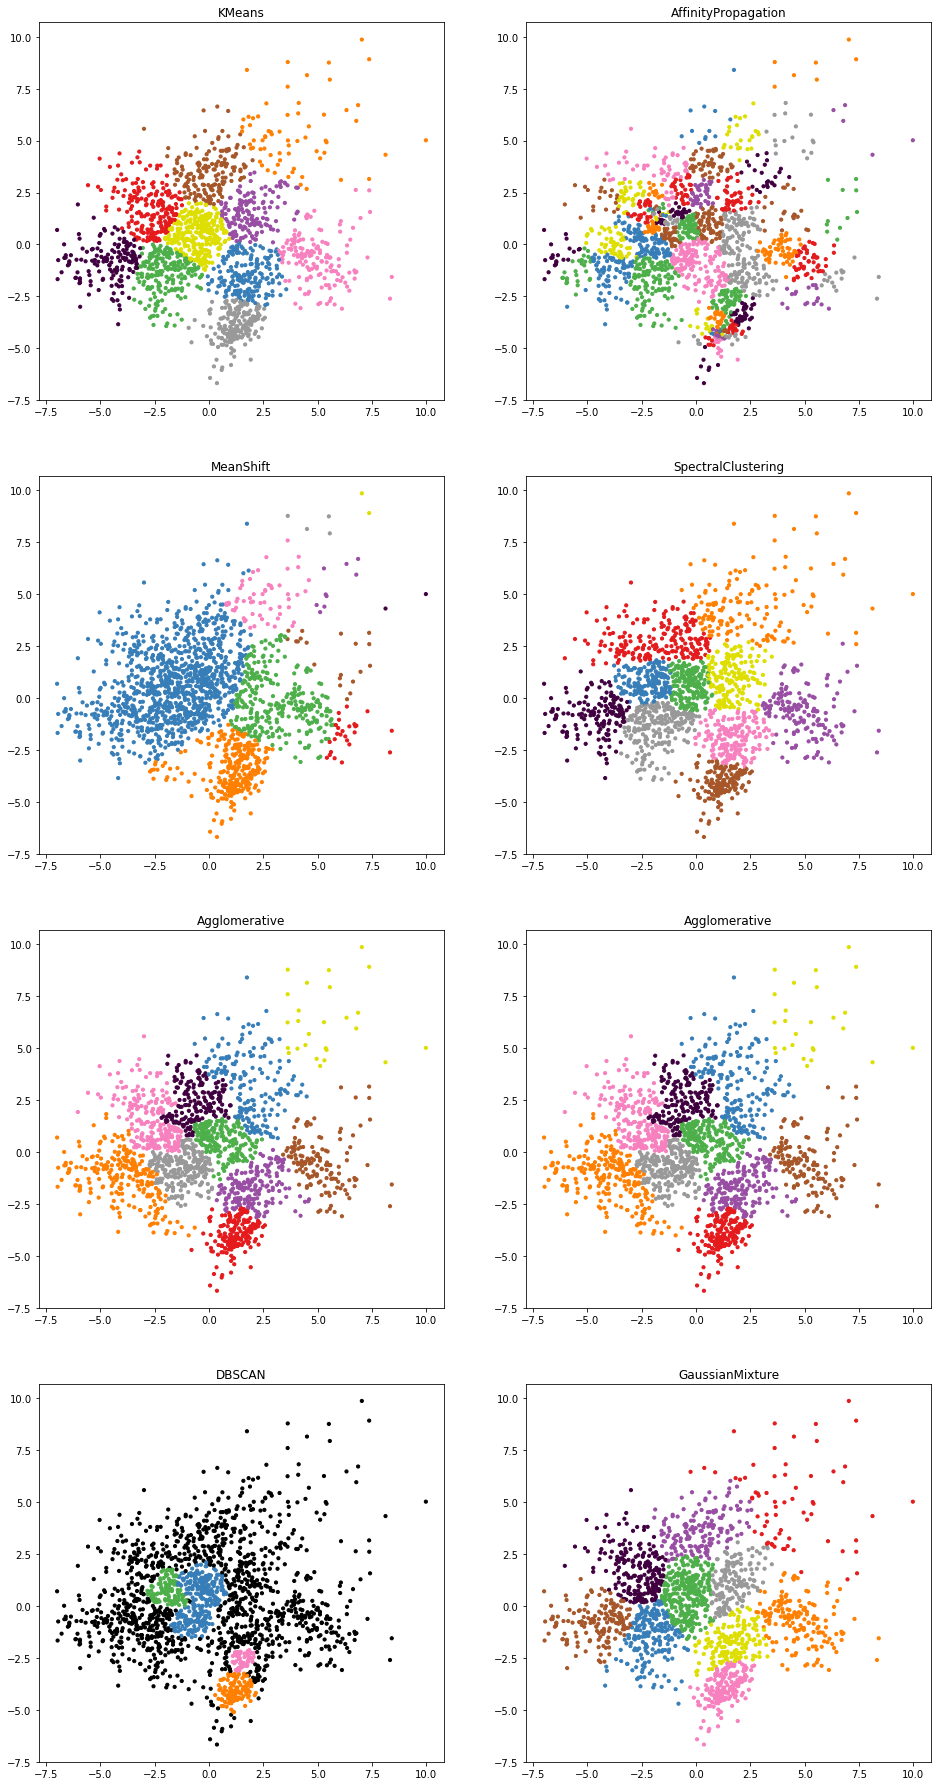

In [3]:
from itertools import cycle, islice
reduced_data = PCA(n_components=2).fit_transform(data)
fig = plt.figure(figsize=(16, 32))


def draw_image(algorithm,X,pos,name):
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(4, 2, pos)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00','#400040']),
                                      int(max(y_pred) + 1))))
    colors = np.append(colors, ["#000000"])
    plt.title(name)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    
    
pos=1
estimator=KMeans(init='random', n_clusters=n_digits, n_init=10)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="KMeans")

pos+=1
estimator=AffinityPropagation()
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="AffinityPropagation")

pos+=1
estimator=MeanShift(bandwidth=1.5)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="MeanShift")

pos+=1
estimator=SpectralClustering(n_clusters=n_digits,
                             assign_labels="discretize",
                             random_state=0,
                             affinity="nearest_neighbors")
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="SpectralClustering") 

pos+=1
estimator=AgglomerativeClustering(linkage="ward", n_clusters=10)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="Agglomerative") 

pos+=1
estimator=AgglomerativeClustering(linkage="ward", n_clusters=10)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="Agglomerative") 

pos+=1
estimator=DBSCAN(eps=0.5, min_samples=40)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="DBSCAN") 

pos+=1
estimator = mixture.GaussianMixture(
        n_components=10, covariance_type='full')
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="GaussianMixture") 


fig.savefig("digit.jpg")

